In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
df=pd.read_csv("/content/my_data.csv")
df

,Distance,Trip duration (minute),time_of_day,Traffic level,weather,vehicle type,ride_price
0,1000.0,33.0,morning,high,storm,economy,112.40
1,200.0,2.0,night,low,rain,premium,25.60
2,450.0,3.0,morning,medium,sun,xl,42.90
3,800.0,30.0,night,low,storm,premium,84.00
4,1200.0,45.0,Afternoon,medium,sun,economy,125.00
...,...,...,...,...,...,...,...
144,522.0,22.0,night,low,rain,xl,63.70
145,6876.0,196.0,night,low,sun,xl,545.60
146,588.0,21.0,morning,medium,sun,xl,66.20
147,975.0,29.0,morning,high,storm,premium,98.95


In [ ]:
df.head()

,Distance,Trip duration (minute),time_of_day,Traffic level,weather,vehicle type,ride_price
0,1000.0,33.0,morning,high,storm,economy,112.4
1,200.0,2.0,night,low,rain,premium,25.6
2,450.0,3.0,morning,medium,sun,xl,42.9
3,800.0,30.0,night,low,storm,premium,84.0
4,1200.0,45.0,Afternoon,medium,sun,economy,125.0


In [ ]:
df.shape

(149, 7)

**Data cleansing and Feature Engineering**

Identify missing values

In [ ]:
df.isnull().sum()

,0
Distance,1
Trip duration (minute),1
time_of_day,0
Traffic level,0
weather,0
vehicle type,1
ride_price,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance                148 non-null    float64
 1   Trip duration (minute)  148 non-null    float64
 2   time_of_day             149 non-null    object 
 3   Traffic level           149 non-null    object 
 4   weather                 149 non-null    object 
 5   vehicle type            148 non-null    object 
 6   ride_price              148 non-null    float64
dtypes: float64(3), object(4)
memory usage: 8.3+ KB


as we saw in the above there are nulls so we have to correct these nulls by filling the quantitaive by median ana the qualitative by mode.Because,I did not need to delete those files.

In [ ]:
df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce')
Distance_median = df['Distance'].median()
df['Distance'] = df['Distance'].fillna(Distance_median)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance                149 non-null    float64
 1   Trip duration (minute)  148 non-null    float64
 2   time_of_day             149 non-null    object 
 3   Traffic level           149 non-null    object 
 4   weather                 149 non-null    object 
 5   vehicle type            148 non-null    object 
 6   ride_price              148 non-null    float64
dtypes: float64(3), object(4)
memory usage: 8.3+ KB


In [ ]:
df['Trip duration (minute)'] = pd.to_numeric(df['Trip duration (minute)'], errors='coerce')
Trip_duration_median = df['Trip duration (minute)'].median()
df['Trip duration (minute)'] = df['Trip duration (minute)'].fillna(Trip_duration_median)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance                149 non-null    float64
 1   Trip duration (minute)  149 non-null    float64
 2   time_of_day             149 non-null    object 
 3   Traffic level           149 non-null    object 
 4   weather                 149 non-null    object 
 5   vehicle type            148 non-null    object 
 6   ride_price              148 non-null    float64
dtypes: float64(3), object(4)
memory usage: 8.3+ KB


Now I will fill the cathegorical part with null value which is the vehicle type.

In [ ]:
mode_value=df['vehicle type'].mode()[0]
df['vehicle type']=df['vehicle type'].fillna(mode_value)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance                149 non-null    float64
 1   Trip duration (minute)  149 non-null    float64
 2   time_of_day             149 non-null    object 
 3   Traffic level           149 non-null    object 
 4   weather                 149 non-null    object 
 5   vehicle type            149 non-null    object 
 6   ride_price              148 non-null    float64
dtypes: float64(3), object(4)
memory usage: 8.3+ KB


In [ ]:
ride_price_median=df['ride_price'].median()
df['ride_price']=df['ride_price'].fillna(ride_price_median)

in the above we did in the bracket that ride_price_median not ride_price median is because the ride_price variable already holds the median value, so you should use ride_price_median directly to fill the missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance                149 non-null    float64
 1   Trip duration (minute)  149 non-null    float64
 2   time_of_day             149 non-null    object 
 3   Traffic level           149 non-null    object 
 4   weather                 149 non-null    object 
 5   vehicle type            149 non-null    object 
 6   ride_price              149 non-null    float64
dtypes: float64(3), object(4)
memory usage: 8.3+ KB


as we can see from our data information now we do not have a null data therefore we are clear with missing values.next i will check the inconsistent values and outliers respectively.

In [ ]:
df.describe()

,Distance,Trip duration (minute),ride_price
count,149.000000,149.000000,149.000000
mean,2230.875839,73.395973,158.509228
std,6321.654082,208.204675,177.791783
min,66.000000,2.000000,18.900000
25%,563.000000,21.000000,63.850000
50%,765.500000,29.000000,84.825000
75%,988.000000,40.000000,112.400000
max,73637.000000,2455.000000,725.350000


In [ ]:
df.describe(include='all')

,Distance,Trip duration (minute),time_of_day,Traffic level,weather,vehicle type,ride_price
count,149.000000,149.000000,149,149,149,149,149.000000
unique,NaN,NaN,4,3,3,3,NaN
top,NaN,NaN,morning,high,rain,economy,NaN
freq,NaN,NaN,44,61,67,64,NaN
mean,2230.875839,73.395973,NaN,NaN,NaN,NaN,158.509228
std,6321.654082,208.204675,NaN,NaN,NaN,NaN,177.791783
min,66.000000,2.000000,NaN,NaN,NaN,NaN,18.900000
25%,563.000000,21.000000,NaN,NaN,NaN,NaN,63.850000
50%,765.500000,29.000000,NaN,NaN,NaN,NaN,84.825000
75%,988.000000,40.000000,NaN,NaN,NaN,NaN,112.400000


as we can see from the above we have outliers in the distance is 73637. since,this data affects my whole data I decided to drop it.

In [ ]:
outlier_rows=df[df['Distance']>1000]
print(outlier_rows)

     Distance  Trip duration (minute) time_of_day Traffic level weather  \
4      1200.0                    45.0   Afternoon        medium     sun   
6      3453.0                   115.0   Afternoon          high   storm   
9      6478.0                   216.0     morning          high    rain   
13     1234.0                    50.0       night           low   storm   
18     5436.0                   181.0     morning          high   storm   
25     7802.0                   223.0     morning          high    rain   
28     6643.0                   190.0   Afternoon          high   storm   
32     6437.0                   161.0     morning          high    rain   
40     3453.0                   123.0     evening        medium     sun   
44     5555.0                   159.0       night           low     sun   
51     5462.0                   182.0   Afternoon          high    rain   
54     8967.0                   299.0   Afternoon          high   storm   
59     7854.0            

in the above i identified that the outlier exists in the 102th row

In [ ]:
df=df.drop(102)

In [ ]:
df.shape

(148, 7)

I droped the specific row that consists outlier.

In [ ]:
df.describe()

,Distance,Trip duration (minute),ride_price
count,148.000000,148.000000,148.000000
mean,1748.402027,57.304054,159.007095
std,2305.397064,69.268153,178.291244
min,66.000000,2.000000,18.900000
25%,563.000000,20.750000,63.812500
50%,765.250000,29.000000,84.825000
75%,986.500000,40.000000,112.400000
max,8967.000000,299.000000,725.350000


In [ ]:
df.shape

(148, 7)

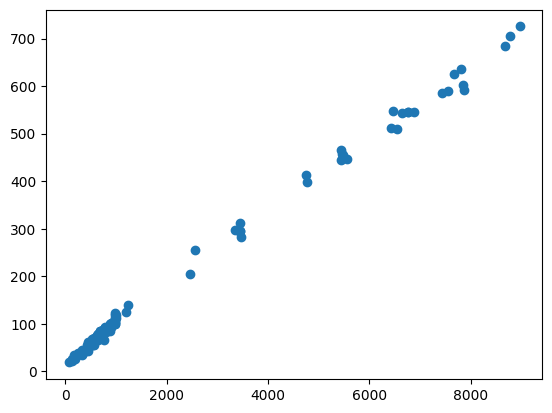

In [ ]:
plt.scatter(df['Distance'], df['ride_price'])
plt.show()

in the above visualization we can look after removong the outlier it looks exactly linear so our model is doing good.

**Regression Model: Price Prediction**

In [ ]:
x=df['Distance']
y=df['ride_price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=None)

In [ ]:
model=LinearRegression()
model.fit(x.values.reshape(-1, 1),y)
predictions=model.predict(x_test.values.reshape(-1, 1))

In [ ]:

y_pred=model.predict(x_test.values.reshape(-1, 1))

now evaluating the data using y_pred and y-test.

In [ ]:
score=r2_score(y_test,y_pred)
error=mean_squared_error(y_test,y_pred)
print(f'r2_score:{score}')
print(f'error:{error}')

r2_score:0.8611111111111112
error:0.03333333333333333


here our r2_score and error are in good situation.

In [ ]:
new_trip=[[50]]
predictoins=model.predict(new_trip)
print(f'a 50km costs:{predictions[0]:.2f}')

a 50km costs:93.65


as we can see from the above the moedl can predict the cost successfully.

#drawing actual vs predicted

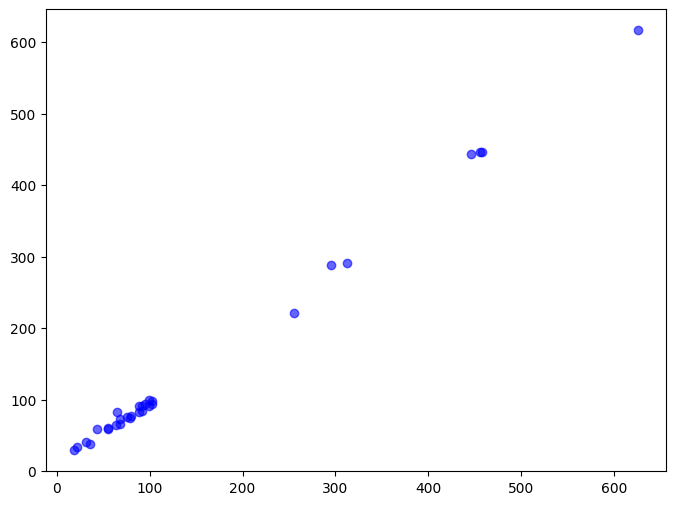

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,color='blue',alpha=0.6,label='predicted vs actual')

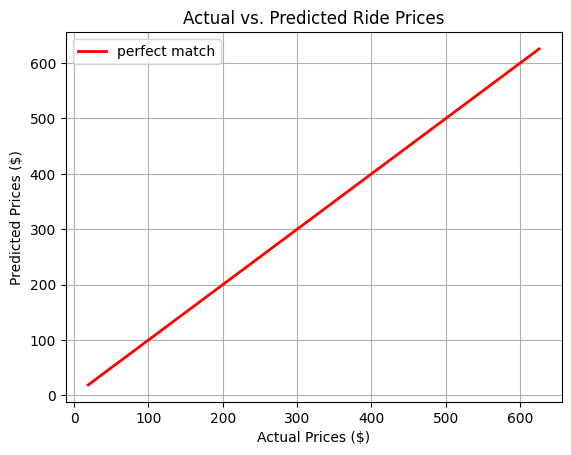

In [ ]:
max_val=max(max(y_test),max(y_pred))
min_val=min(min(y_test),min(y_pred))
plt.plot([min_val,max_val],[min_val,max_val],color='red',lw=2,label='perfect match')
plt.xlabel('Actual Prices ($)')
plt.ylabel('Predicted Prices ($)')
plt.title('Actual vs. Predicted Ride Prices')
plt.legend()
plt.grid(True)
plt.show()

#classification model
first calculate the median to separate our price as high and low


In [ ]:
threshold=df['ride_price'].median()
print(f'the threshold price is {threshold}')

the threshold price is 84.82499999999999


now set binary catagory

In [ ]:
df['price_catagory']=(df['ride_price']>=threshold).astype(int)

trainig regression model

In [ ]:
x=df[['Distance']]
y=df['price_catagory']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
clf=LogisticRegression()

evaluating the regressin model

In [ ]:
clf.fit(x_train.values.reshape(-1,1),y_train)
y_pred=clf.predict(x_test.values)

calculate accuracy

In [ ]:
acc=accuracy_score(y_test,y_pred)
print(f"model accuracy:{acc:.2%}")

model accuracy:96.67%


confusion matrix

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:")
print(cm)

confusion matrix:
[[12  0]
 [ 1 17]]


visualizing the results

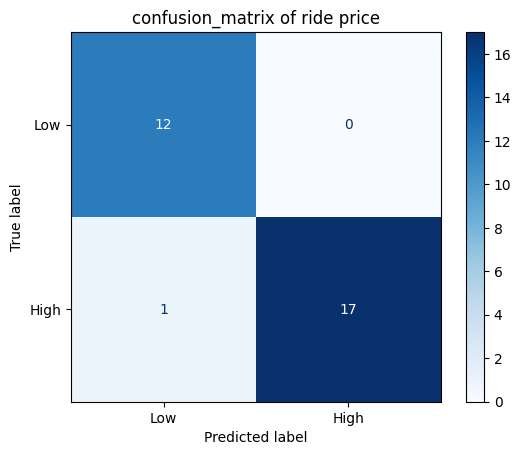

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf,x_test.values,y_test,display_labels=['Low','High'],cmap='Blues')
plt.title('confusion_matrix of ride price')
plt.show()

#how probablities used in classification
In classification, the model doesn't just "guess" a category; it actually performs a calculation to determine the likelihood that a data point belongs to a certain group.
here we use the sigmoid function to catagorize the given by setting 0.5 as a medium and above that as high and below 0.5 as low.

#model evaluation and comparison

comparing regression and classification outcomes

#regression outcomes
my regression model shows the predicted values closely follow the perfect matchline,This is because the predicted and the actual values lie on the red line in the visualization part.this is because my data is accurately calculated and I have done great data cleansing and feature engineering.

#classification outcomes

from the graph I visualized
total samples=12+0+1+17=30
correct predictions=12+17=29
incorrect predictions=0+1=1
accuracy=29/30=96.7%
this shows strong performance of the model.
therefore we can conclude my model is doing high accuracy and low misclassification.means it is good model.


HOw data quality influenced both models
Data Issue,
#Impact on Linear Regression,
Outliers,Tilts the line; ruins the mean error (MSE).
Missing Values,Code crashes or ignores important data.
Wrong Types,TypeError during math operations.
Imbalance,N/A (Linear deals with a spectrum).
#Impact on Logistic Regression
Blurs the boundary; reduces confidence.
Can't calculate probability for that row.
ValueError during .fit().
"High accuracy, but fails to find the minority class."

$the most influential feature in my model is Distance since it affects the price highly.

#Ethical & Practical Reflection
Issue Type,The Specific Problem,The Consequence

->Unfairness,Location-based pricing,Potential discrimination/legal risk.

->Risk of deploying this model,False Positives (overcharging),Loss of customer trust.

->Limitation of my dataset,Only using Distance,Model fails to account for traffic/surges.